### Condition number of a matrix

The norm of a matrix can be defined as:

$||A||_{l^P} = sup \frac{||Ax||}{||x||}$


Condition number of a matrix is the ratio of the largest singular value of that matrix to the smallest singular value.
So if I have a problem like $y=A^{-1}x$

$abs = \frac{||\Delta y||_{Y}}{||\Delta x ||_{X}} = \frac{||A^{-1}\Delta x||}{||\Delta x||} \leq \frac{||A^{-1}||\cdot||\Delta x||}{||\Delta x||} \leq ||A^{-1}|| $

If I choose as the norm of matrixes the norm induced by the norm of vectors, this is true. It is not true for all the matrix norms you could define. Notice that in the finite dimensional case every norm is equal.

$rel \leq ||A^{-1}||\cdot||A||$

The relative condition number is close to infinity when the matrix is not invertible. Because it has at least one 0 eigenvalue, so there is an infinite number of solutions. Notice that if the smallest singular value is close to 0, the matrix is, from a computational point of view, non invertible.

### Numpy - multidimensional data arrays and broadcasting

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
x = linspace(0,1,100)
x

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

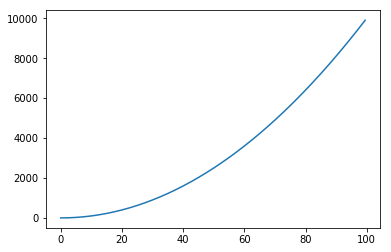

In [11]:
plot (x, x*x)

In [10]:
x = arange(0,100,0.5)
x + 1

array([  1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,   4.5,   5. ,
         5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,   9.5,
        10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,  13.5,  14. ,
        14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,  18. ,  18.5,
        19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,  22.5,  23. ,
        23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,  27. ,  27.5,
        28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,  31.5,  32. ,
        32.5,  33. ,  33.5,  34. ,  34.5,  35. ,  35.5,  36. ,  36.5,
        37. ,  37.5,  38. ,  38.5,  39. ,  39.5,  40. ,  40.5,  41. ,
        41.5,  42. ,  42.5,  43. ,  43.5,  44. ,  44.5,  45. ,  45.5,
        46. ,  46.5,  47. ,  47.5,  48. ,  48.5,  49. ,  49.5,  50. ,
        50.5,  51. ,  51.5,  52. ,  52.5,  53. ,  53.5,  54. ,  54.5,
        55. ,  55.5,  56. ,  56.5,  57. ,  57.5,  58. ,  58.5,  59. ,
        59.5,  60. ,  60.5,  61. ,  61.5,  62. ,  62.5,  63. ,  63.5,
        64. ,  64.5,

We are summing something which is in $R^N$ with something in $R$, so why does it work? This is called broadcasting. What numpy understands is that you have int and floats, so changes the int in floats, then notices that you have an object with dimension 1 and one with dimension 0, so transforms the 0-dim into a 1-dim where every element is 1.

In [16]:
y = np.array([0,1,2,3,4])
y

array([0, 1, 2, 3, 4])

In [23]:
y.shape

(5,)

In [18]:
z = np.array([[0,1,2,3,4]])
z

array([[0, 1, 2, 3, 4]])

In [24]:
z.shape

(1, 5)

In [21]:
w = y + z
w

array([[0, 2, 4, 6, 8]])

In [22]:
w.shape

(1, 5)

In [39]:
a = np.arange(4).reshape((4, 1))
a

array([[0],
       [1],
       [2],
       [3]])

In [40]:
a.shape

(4, 1)

In [41]:
print(w+a)

[[ 0  2  4  6  8]
 [ 1  3  5  7  9]
 [ 2  4  6  8 10]
 [ 3  5  7  9 11]]


I am summing a vector with a matrix, how does this work? There is a common dimension, and numpy uses that. You can even sum a (1,5) and (4,1), because even if the dimension is different, one of the two is one for both, so you can build a matrix doing this: 4 rows of the first and 5 columns of the second, and sum two 5x5 matrices.

In [44]:
x = ones((3,2,4))
y = ones((2,4))
z = ones((3,2))

x+y

array([[[2., 2., 2., 2.],
        [2., 2., 2., 2.]],

       [[2., 2., 2., 2.],
        [2., 2., 2., 2.]],

       [[2., 2., 2., 2.],
        [2., 2., 2., 2.]]])

x+y works, but x+z does not work, because numpy looks for correspondences from the left.

```python
x = ones((2,3,4,5))
y = ones((7))
z = ones((8))


# you need to do this by hand, because python tries to extend one or more dimensions on the left, not on the right
(1,2,3,4,5) + (7,1,1,1,1)
(2,3,4,5,1) + (1,1,1,1,7)

```

NOTE: if you compute a (2,4)\*(2,4) it does not do a matrix multiplication, but an element by element multiplication

### Einsum

In [47]:
#Einstein's rule

x = ones((2,3,4,5,6)) #ijklm
y = ones((4,5,6,7,8)) #klmno

z = einsum('ijklm, klmno -> ijno',x,y)
print(z.shape)

(2, 3, 7, 8)


In [48]:
#Einstein's rule

x = ones((2,3,4,5,6)) #ijklm
y = ones((4,5,6,7,8)) #klmno

z = einsum('ijklm, klmno -> ijkno',x,y) #does not sum over k
print(z.shape)

(2, 3, 4, 7, 8)


In [49]:
#Einstein's rule

x = ones((2,3,4,5,6)) #ijklm
y = ones((4,5,6,7,8)) #klmno

z = einsum('ijklm, klmno -> onkji',x,y) #returns the tranpose matrix
print(z.shape)

(8, 7, 4, 3, 2)


### Error handling

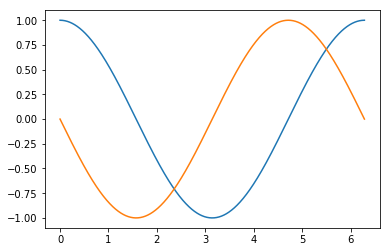

In [85]:
def f(x):
    return cos(x)

def FD(f,x,h):
    return (f(x+h)-f(x))/h

def CFD(f,x,h):
    return (f(x+h)-f(x-h))/(2*h)

def fprime(x):
    return -sin(x)

x=linspace(0,2*pi,1000)
plot(x,f(x))
plot(x,fprime(x))



In [86]:
h = [1.0/n for n in range(10,1001)]

```python
#non pythonic way
h = []
for i in range(10,1001):
    h.append(1.0/1)

#numpy way, only works because of broadcast
h = 1/arange(10,1001)

```

Now let's see the difference between the numerical and analytical solution

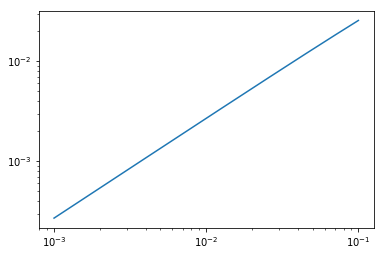

In [87]:
error = [abs((FD(f, 1, s) - fprime(1))) for s in h]

loglog(h,error) #just plot(h,error) makes it difficult to see if it goes linearly

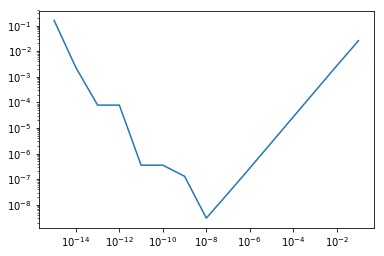

In [88]:
h = 10.0**arange(-15,0)
error = [abs((FD(f, 1, s) - fprime(1))) for s in h]
loglog(h,error)

As soon as I cross $10^{-8}$ random error becomes bigger than truncation error, because ${(10^{-8})}^2$ is the machine precision.

([<matplotlib.lines.Line2D at 0x7f8e8a4c57b8>],
 [<matplotlib.lines.Line2D at 0x7f8e8a540198>])

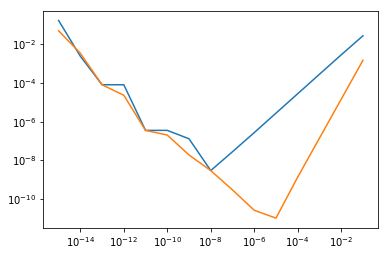

In [90]:
h = 10.0**arange(-15,0)
error = [abs((FD(f, 1, s) - fprime(1))) for s in h]
errorcfd = [abs((CFD(f, 1, s) - fprime(1))) for s in h]
loglog(h,error), loglog(h,errorcfd)

I get now a second order convergence, instead of a first error convergence.

$f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + \frac{h^3}{6}f'''(x) + O(h^4)$

so

$\frac{f(x+h) - f(x)}{x} -f'(x) \approx \frac{h}{2}f''(x) + O(h^2)$

While

$f(x-h) = f(x) - hf'(x) + \frac{h^2}{2}f''(x) - \frac{h^3}{6}f'''(x) + O(h^4)$

so

$\frac{f(x+h) - f(x-h)}{x} -f'(x) \approx 2\frac{h^2}{6}f'''(x) + O(h^4)$

([<matplotlib.lines.Line2D at 0x7f8e8a10ecf8>],
 [<matplotlib.lines.Line2D at 0x7f8e8a0efeb8>])

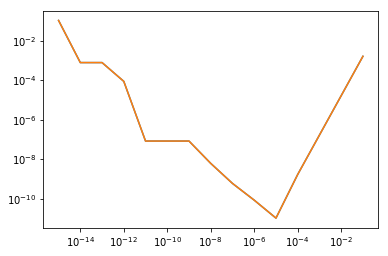

In [96]:
error = [abs((FD(f, pi/2, s) - fprime(pi/2))) for s in h]
errorcfd = [abs((CFD(f, pi/2, s) - fprime(pi/2))) for s in h]
loglog(h,error), loglog(h,errorcfd)